<a href="https://colab.research.google.com/github/clovisdanielss/Colab-Projects/blob/main/mnist-fashion/MNIST_Fashion_Tensorflow_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview

This notebook It's a simple experiment using fashion mnist dataset. 
This dataset contains 60.000 images for training and 10.000 images for test in shape (28,28,1)
Also each image has a class in range [0, 9] meaning:

|Class|Meaning|
|-----|-------|
|0	| T-shirt/top|
|1	|Trouser
|2	|Pullover
|3	|Dress
|4	|Coat
|5	|Sandal
|6	|Shirt
|7	|Sneaker
|8	|Bag
|9	|Ankle boot

### Objective

Our objective It's to create a colthing classifier.

In [52]:
import tensorflow_datasets as tfdset
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
keras = tf.keras

In [54]:
labels = ['T-Shirt/Top', 'Trouser', 'PullOver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
dataset, metadata = tfdset.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteELXHNC/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteELXHNC/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [7]:
train, test = dataset["train"], dataset["test"]

In [22]:
flatten_figure = list(train.take(1).as_numpy_iterator())[0][0].reshape(28*28)
max(flatten_figure), min(flatten_figure)

(255, 0)

How we can see, the images use the pixels values in range 0 until 255. So we will normalize those images to become of range 0 until 1.

In [23]:
def normalize(instance, label):
  instance = tf.cast(instance, tf.float32)
  instance /= 255
  return instance, label

train = train.map(normalize)
test = test.map(normalize)

In [24]:
flatten_figure = list(train.take(1).as_numpy_iterator())[0][0].reshape(28*28)
max(flatten_figure), min(flatten_figure)

(1.0, 0.0)

Now we can see that the images are normalized

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
n_train_exemples = 60000
train = train.cache().repeat().shuffle(n_train_exemples).batch(batch_size)
test = test.cache().batch(batch_size)

In [28]:
import math
model.fit(train, epochs=5, steps_per_epoch=math.ceil(n_train_exemples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4972 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3759 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8903


In [29]:
n_test_examples = 10000
model.evaluate(test, steps = math.ceil(n_train_exemples/batch_size))

 312/1875 [===>..........................] - ETA: 12s - loss: 0.3453 - accuracy: 0.8766WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1875 batches). You may need to use the repeat() function when building your dataset.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.3465 - accuracy: 0.8762


[0.3464779257774353, 0.8762000203132629]

In [48]:
image, label = list(test.take(1).as_numpy_iterator())[0]
single_image = image[0,:,:,:]
label = label[0]
single_image.shape

(28, 28, 1)

Text(0.5, 1.0, 'Label: Coat Predicted: Coat')

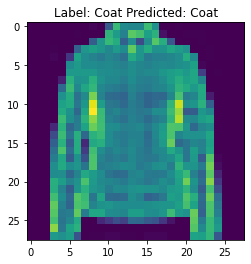

In [55]:
plt.imshow(single_image.reshape(28,28))
pred = model.predict(single_image.reshape(1,28,28,1))
pred = np.argmax(pred, axis = -1)[0]
plt.title(f"Label: {labels[label]} Predicted: {labels[pred]}")

In [58]:
model.save("mnist-fashion-model.h5")

In [59]:
from google.colab import files
files.download('mnist-fashion-model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>